In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

- This notebook shows the magnitude of different non-static pressure terms in the EOS of platinum by Dorogokupets and Dewaele (2007, HPR).

# 1. General setup

In [4]:
import uncertainties as uct
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
import pytheos as eos

In [5]:
v0 = 3.9231**3
v = np.linspace(v0, v0 * 0.8, 20)

# 2. Calculate thermal pressure

In [6]:
p_th = eos.dorogokupets2007_pth(v, 2000., v0, 2.82, 1.83, 8.11, 220., 1, 4)

# 3. Calculate pressure from anharmonicity

In [7]:
help(eos.zharkov_panh)

Help on function zharkov_panh in module pytheos.eqn_anharmonic:

zharkov_panh(v, temp, v0, a0, m, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate pressure from anharmonicity for Zharkov equation
    the equation is from Dorogokupets 2015
    
    :param v: unit-cell volume in A^3
    :param temp: temperature in K
    :param v0: unit-cell volume in A^3 at 1 bar
    :param a0: parameter in K-1 for the Zharkov equation
    :param m: parameter for the Zharkov equation
    :param n: number of elements in a chemical formula
    :param z: number of formula unit in a unit cell
    :param three_r: 3 times gas constant
    :return: anharmonic contribution for pressure in GPa



In [8]:
p_anh = eos.zharkov_panh(v, 2000., v0, -166.9e-6, 4.32, 1, 4)

# 4. Calculate pressure from electronic effects

In [9]:
help(eos.zharkov_pel)

Help on function zharkov_pel in module pytheos.eqn_electronic:

zharkov_pel(v, temp, v0, e0, g, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate electronic contributions in pressure for the Zharkov equation
    the equation can be found in Sokolova and Dorogokupets 2013
    
    :param v: unit-cell volume in A^3
    :param temp: temperature in K
    :param v0: unit-cell volume in A^3 at 1 bar
    :param e0: parameter in K-1 for the Zharkov equation
    :param g: parameter for the Zharkov equation
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature, 300 K
    :param three_r: 3 times gas constant
    :return: electronic contribution in GPa



In [10]:
p_el = eos.zharkov_pel(v, 2000., v0, 260.e-6, 2.4, 1, 4)

# 5. Plot with respect to volume

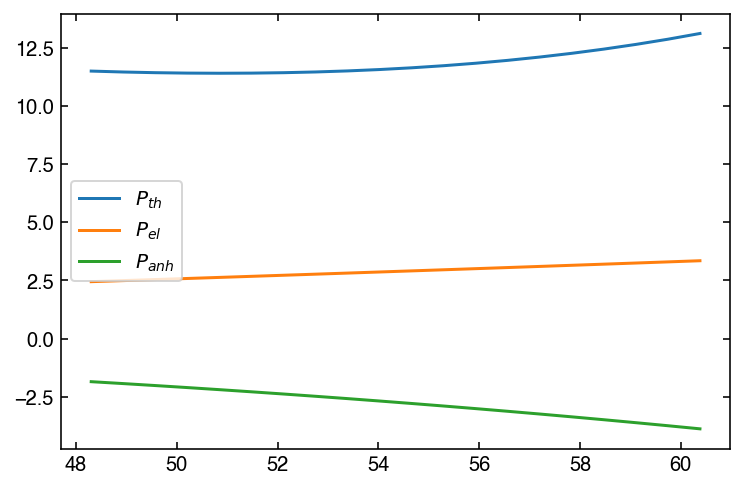

In [11]:
plt.plot(v, p_th, label='$P_{th}$')
plt.plot(v, p_el, label='$P_{el}$')
plt.plot(v, p_anh, label='$P_{anh}$')
plt.legend();

# 5. Plot with respect to pressure

We call the built-in dorogokupets2007 scale in `pytheos`.

In [12]:
dorogokupets2007_pt = eos.platinum.Dorogokupets2007()

In [13]:
help(dorogokupets2007_pt)

Help on Dorogokupets2007 in module pytheos.scales.platinum object:

class Dorogokupets2007(pytheos.scales.objs.MGEOS)
 |  Dorogokupets and Dewaele. 2007. HPR 27, 431+
 |  
 |  Method resolution order:
 |      Dorogokupets2007
 |      pytheos.scales.objs.MGEOS
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, v0=60.37930856339099)
 |      :param params_st: elastic parameters for static EOS in an OrderedDict
 |          [v0 in A^3, k0 in GPa, k0p]
 |      :param params_th: thermal parameters for thermal EOS in an OrderedDict.
 |          The component can differ depending on the equation used.
 |      :param params_anh: anharmonic parameters for anharmonic correction in
 |          an OrderedDict.  The component can differ depending on the
 |          equation used.
 |      :param params_el: electronic parameters for electronic correction in
 |          an OrderedDict. The component can differ depending on the
 |          equation used.
 |      :param eqn_st:

In [14]:
p = dorogokupets2007_pt.cal_p(v, 2000.)

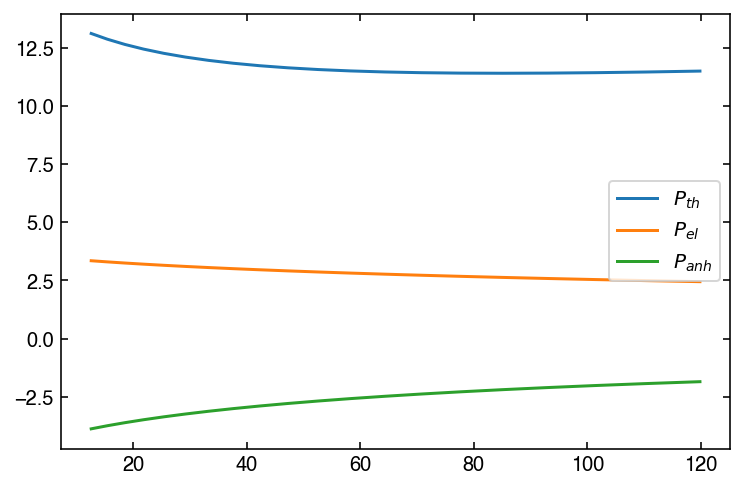

In [15]:
plt.plot(unp.nominal_values(p), p_th, label='$P_{th}$')
plt.plot(unp.nominal_values(p), p_el, label='$P_{el}$')
plt.plot(unp.nominal_values(p), p_anh, label='$P_{anh}$')
plt.legend();